https://nbviewer.org/urls/qutip.org/qutip-tutorials/tutorials-v5/time-evolution/009_brmesolve-cavity-QED.ipynb

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from qutip import (about, basis, brmesolve, destroy, identity, ket2dm, mesolve,
                   plot_energy_levels, plot_expectation_values, tensor)

Here we setup as system of a atom-cavity interaction with dissipation to a bath.

In [2]:
N = 10  # num. cavity modes

# operators
a = tensor(destroy(N), identity(2))
sm = tensor(identity(N), destroy(2))

# expectation operators
e_ops = [a.dag() * a, sm.dag() * sm]

# initial state
psi0 = ket2dm(tensor(basis(N, 1), basis(2, 0)))

In the following we setup the frequencies and coupling strength for the atom-cavity system and define the dissipation to the environment. Here we only consider a leaky cavity, i.e. losses to the environment only from the cavity and not from the atom.



In [3]:
w0 = 1.0 * 2 * np.pi
g_weak = 0.1 * 2 * np.pi
g_strong = 0.75 * 2 * np.pi
kappa = 0.05

# collapse operators (for mesolve)
c_ops = [np.sqrt(kappa) * a]
# noise power spectrum (for brmesolve)
a_ops = [[(a + a.dag()), lambda w: kappa * (w > 0)]]

# Hamiltonians
H_no = w0 * a.dag() * a + w0 * sm.dag() * sm
H_weak = w0 * a.dag() * a + w0 * sm.dag() * sm + \
         g_weak * (a + a.dag()) * (sm + sm.dag())
H_strong = w0 * a.dag() * a + w0 * sm.dag() * sm + \
           g_strong * (a + a.dag()) * (sm + sm.dag())

We now solve the dynamics of the atom-cavity interaction using qutip.mesolve and qutip.brmesolve for the two different coupling strengths.

## Weak coupling

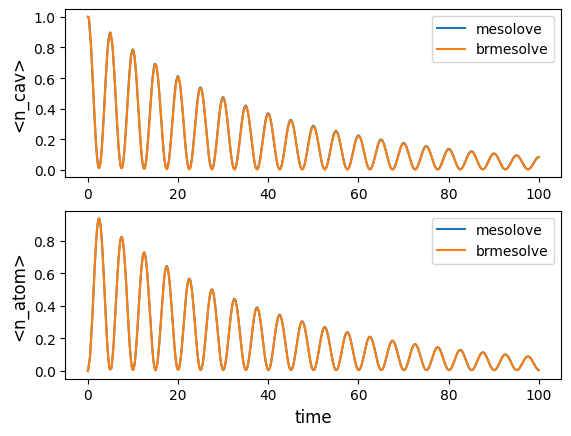

In [4]:
# times for simulation
times = np.linspace(0, 10 * 2 * np.pi / g_weak, 1000)
# simulation
result_me_weak = mesolve(H_weak, psi0, times, c_ops, e_ops)
result_brme_weak = brmesolve(H_weak, psi0, times, a_ops, e_ops)
fig, axes = plot_expectation_values(
    [result_me_weak, result_brme_weak], ylabels=["<n_cav>", "<n_atom>"]
)
for ax in axes:
    ax.legend(['mesolove', 'brmesolve'], loc='upper right')

For the weak coupling strength between atom and cavity we obtain similar results from Lindblad master equation solver qutip.mesolve and the Bloch-Redfield solver qutip.brmesolve.

## Strong coupling

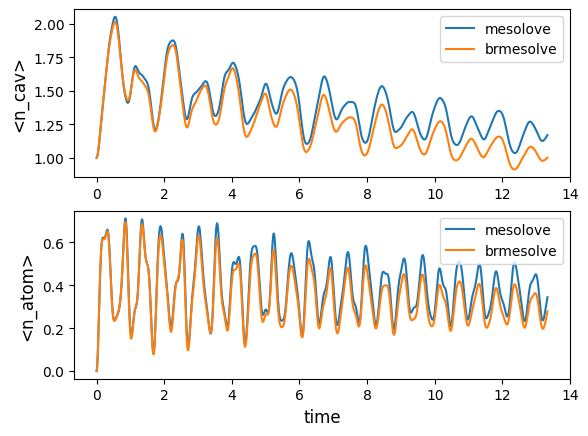

In [5]:
# times for simulation
times = np.linspace(0, 10 * 2 * np.pi / g_strong, 1000)
# simulation
result_me_strong = mesolve(H_strong, psi0, times, c_ops, e_ops)
result_brme_strong = brmesolve(H_strong, psi0, times, a_ops, e_ops)
fig, axes = plot_expectation_values(
    [result_me_strong, result_brme_strong], ylabels=["<n_cav>", "<n_atom>"]
)
for ax in axes:
    ax.legend(['mesolove', 'brmesolve'], loc='upper right')

In the strong coupling regime there are differences in the solution of the two solvers. This is due to the fact that the eigenstates of the system with strong coupling have contributions from atom and the cavity system, i.e. hybridized eigenstates. The Lindbladian master equation solver assumes that the dissipation of a subsystem, here losses in the cavity, does not affect the state of the other subsystem, here the atom. However, for the strongly coupled Hamiltonian this is not true anymore and the dissipation leads to transitions between eigenstates of the coupled system, i.e. also affects the atomic state. By definition the Bloch-Redfield solver takes this hybridization into account and yields the more accurate result for such systems.

We can see this hybridization of the eigenstates from the energy levels. In the system without any interaction, both the atom and the cavity have the same energy levels as we defined them with the similar frequency w_0. For weak interaction the energy levels split up by a small constant, but do not mix up. For strong coupling the energy levels from originally different states bunch together and show the mixing contribution of atom and cavity to the systems eigenstates.

(<Figure size 640x480 with 1 Axes>, <Axes: >)

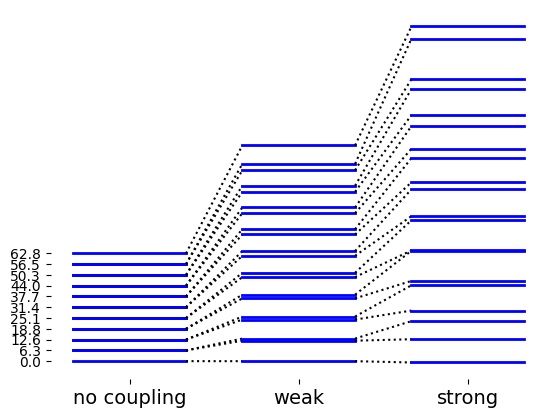

In [6]:
plot_energy_levels([H_no, H_weak, H_strong],
                   h_labels=["no coupling", "weak", "strong"])